1 REGRESSION LINEAIRE

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('WineQT.csv')

VISUALISATION DES DONNEES

Nous commençons par une étape de visualisation des données. Cette étape nous permet de voir la distribution de nos données.

In [18]:
def plot_hists(df):
    fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))
    for n in range(12):
        i = n % 3
        j = n % 4
        ax[i, j].hist(df.iloc[:, n], bins='auto')
        ax[i, j].set_xlabel(df.columns[n])

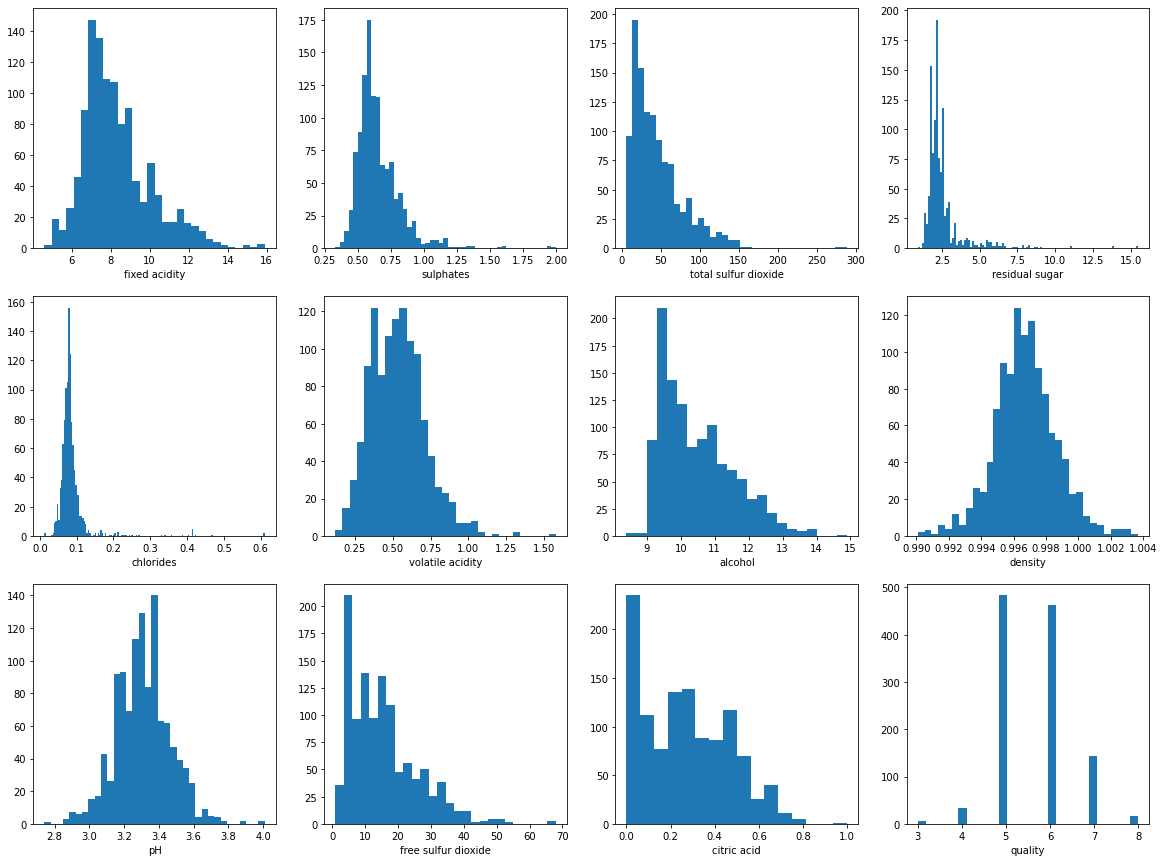

In [22]:
plot_hists(df)

Grâce à cette visualisation, nous modifions les colonnes qui ne semblent pas avoir une distribution normale.
On normalise avec un paramètre trouvé à la main pour chaque caractéristique et on standardise.

c:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


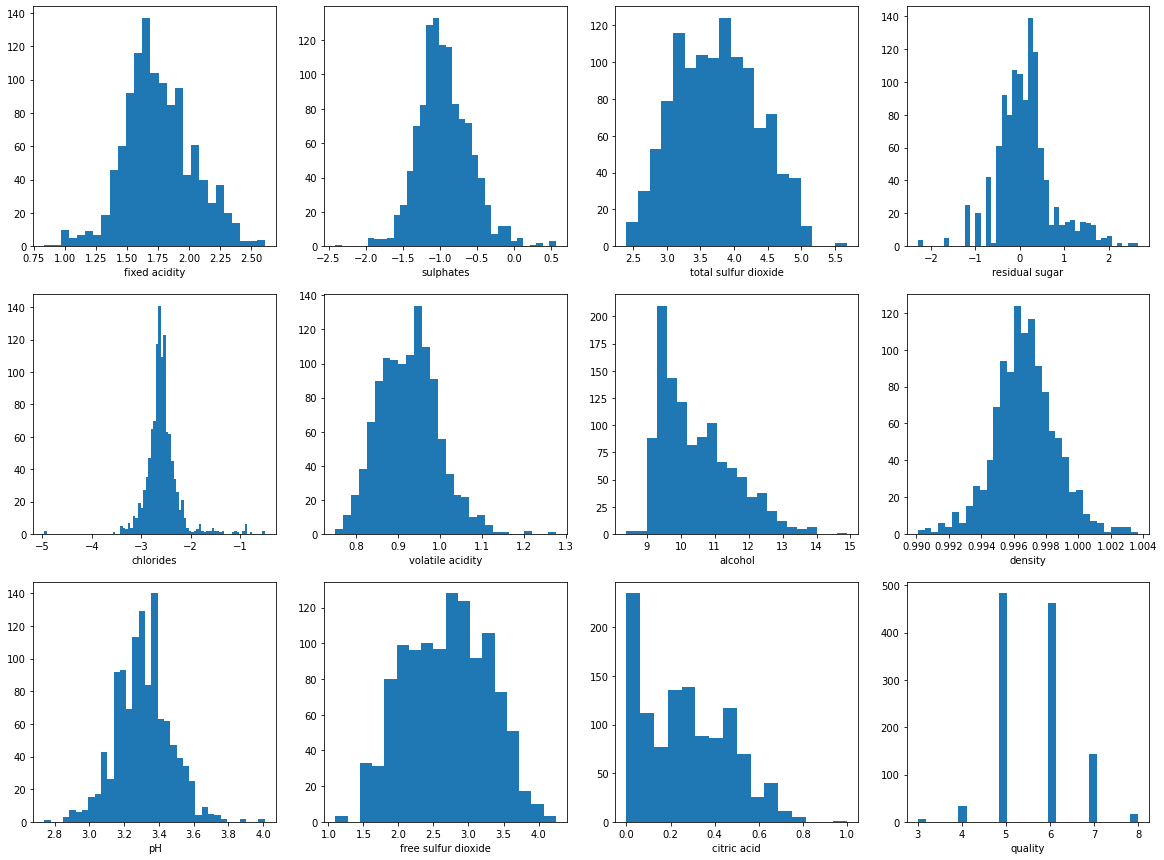

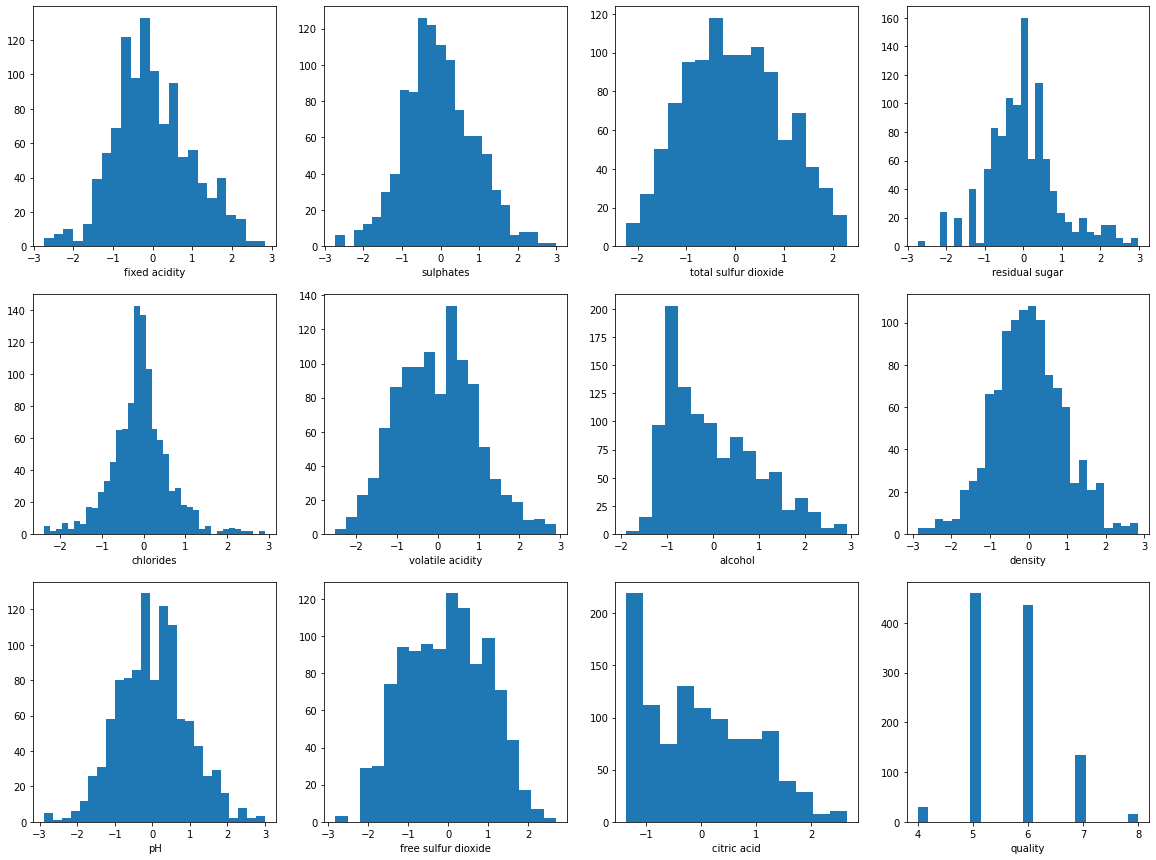

In [23]:
#mettre entre 0 et 1
def normalize(df, property, parameter):
    df[property] = np.log(df[property] + parameter)

normalize(df, "fixed acidity", -2.3)
normalize(df, "sulphates", -0.24)
normalize(df, "total sulfur dioxide", 5)
normalize(df, "residual sugar", -1.1)
normalize(df, "chlorides", -0.005)
normalize(df, "volatile acidity", 2)
normalize(df, "free sulfur dioxide", 2)
plot_hists(df)

#moyenne en 0 et écart type de 1( valeur entre -3 et 3)
standardized = (df - df.mean()) / df.std()
standardized = standardized[(np.abs(standardized) < 3).all(axis=1)]

standardized["quality"]=df["quality"]
df=standardized
plot_hists(df)

Souhaitant prédire la qualité, nous allons afficher les graph des différentes caractéristiques en fonction de la qualité, ainsi qu'une matrice de corrélation linéaire.

<Axes: >

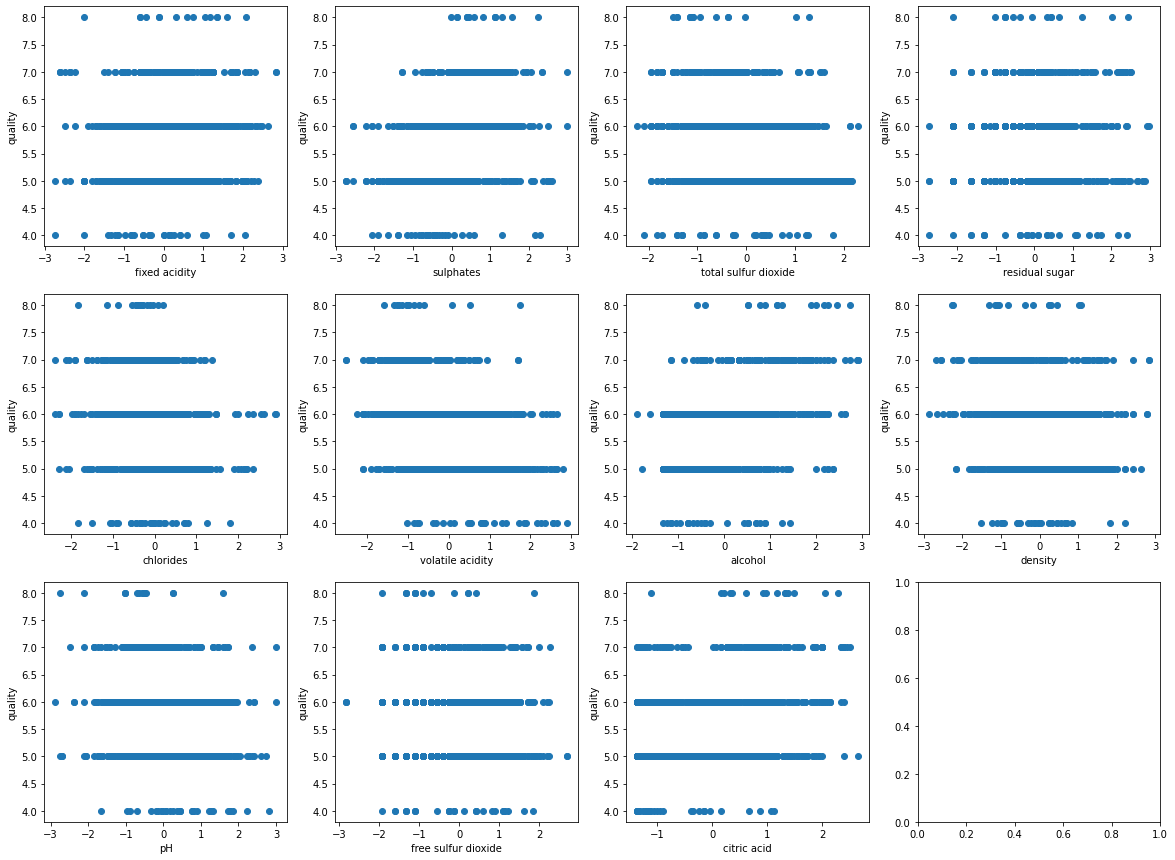

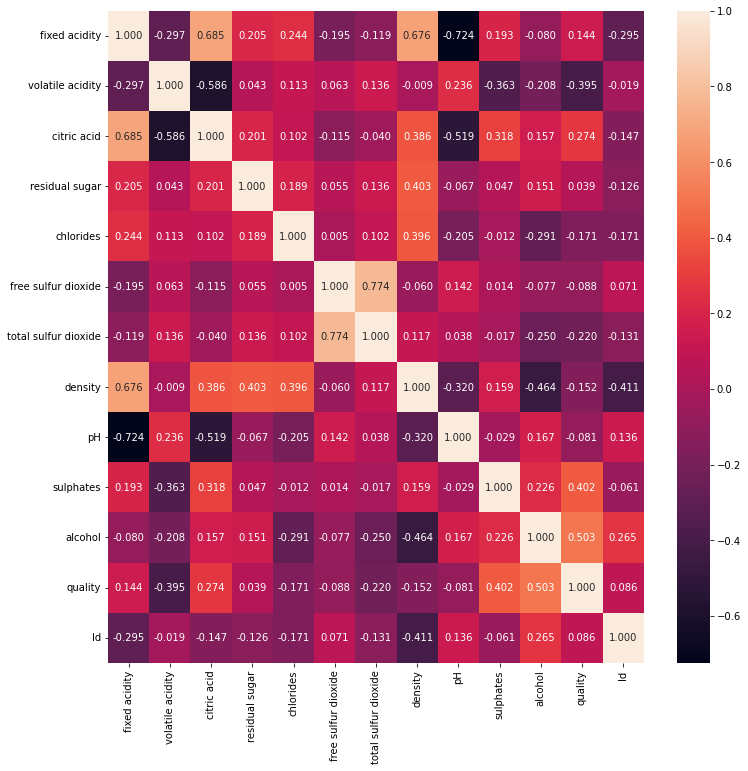

In [24]:
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))
for n in range(11):
    i = n % 3
    j = n % 4
    ax[i, j].scatter(df.iloc[:, n], df['quality'])
    ax[i, j].set_xlabel(df.columns[n])
    ax[i, j].set_ylabel('quality')

import seaborn as sns

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 12))
correlation = df.corr()
sns.heatmap(correlation, annot=True, fmt='.3f')

Certaines caractéristiques sont particulièrement corrélées. Mais on ne détecte rien de très intéressant pour la qualité. Le coefficient R ne dépassant jamais 0.5, on va garder toutes les données et continuer.

PREMIERE METHODE : POSED LINEAR PROBLEM

Nous allons pour cette première méthode traiter la question comme une régression linéaire.
On aura donc quality = w1*fixe_acidity + w2* volatile_acidity+ ... + w10*sulphates + b

Préparation des données :

In [25]:
import numpy as np
import matplotlib.pyplot as plt
# load the dataset

print(df)
y_train = df['quality']
X_train= [df['fixed acidity'],  df['volatile acidity']  ,df['citric acid']  ,df['residual sugar'],  df['chlorides'],df['free sulfur dioxide']  ,df['total sulfur dioxide'],  df['density']    ,df['pH'],  df['sulphates']]
X_features = ['fixed acidity',  'volatile acidity'  ,'citric acid'  ,'residual sugar',  'chlorides','free sulfur dioxide'  ,'total sulfur dioxide',  'density'    ,'pH',  'sulphates']
X_train=np.transpose(np.asmatrix(X_train))
y_train=np.asarray(y_train)
nb_feature=len(X_features)

print(y_train)
print("nombre d'observations X: ",len(X_train))
print("nombre d'observations y: ",len(y_train))
# fig,ax=plt.subplots(1, nb_feature, figsize=(30, 5), sharey=True)
# for i in range(len(ax)):
#     ax[i].scatter([X_train[:,i]],[y_train])
#     ax[i].set_xlabel(X_features[i])
# ax[0].set_ylabel("Quality")
# plt.show()





      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0         -0.449730          0.959130    -1.364429       -0.552408  -0.190766   
1         -0.178276          1.883541    -1.364429        0.439229   0.583043   
2         -0.178276          1.273943    -1.161059        0.087218   0.391851   
3          1.552041         -1.462616     1.482750       -0.552408  -0.231431   
4         -0.449730          0.959130    -1.364429       -0.552408  -0.190766   
...             ...               ...          ...             ...        ...   
1138      -1.323138         -0.086034    -0.703477        0.087218  -0.190766   
1139      -0.899700          0.528319    -0.957689       -0.552408  -0.533480   
1140      -1.414157          0.418561    -0.957689       -0.366604   0.325178   
1141      -1.701916          0.140428    -0.856004       -0.050044  -0.820400   
1142      -1.701916          0.664345    -0.754319       -0.366604  -0.231431   

      free sulfur dioxide  

NOUVELLE MODIFICATION DU JEU DE DONNEES :

on a trop de vins de qualité égales à 5 ou 6... le modèle pourrait se concentrer sur des notes de 5 et 6 pour que la somme des erreures soit minimale. On va donc modifier le jeu de données pour avoir une répartition plus homogène.

[[-0.44973019  0.95913034 -1.36442937 ...  0.55561117  1.27013897
  -0.57188487]
 [-0.17827559  1.88354092 -1.36442937 ...  0.03614877 -0.70861736
   0.33451607]
 [-0.17827559  1.27394285 -1.16105938 ...  0.14004125 -0.32563227
   0.13352038]
 ...
 [-1.41415681  0.41856081 -0.95768939 ... -0.9508298   0.88715387
  -0.39933166]
 [-1.70191559  0.14042794 -0.8560044  ... -0.83654807  1.33396982
   0.80999482]
 [-1.70191559  0.66434478 -0.7543194  ... -0.65473623  1.65312406
   0.52224935]]
[5 5 5 ... 5 6 5]
(533,)
(533, 10)


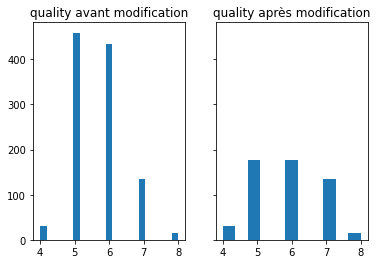

In [26]:
import random
X_norm=X_train
print(X_norm)
print(y_train)
fig,ax=plt.subplots(1,2,sharey=True)
ax[0].hist(df["quality"], bins='auto',label="quality")
ax[0].set_title("quality avant modification")
supp=[]
#on supprime aleatoirement des valeurs de notes 5 et 6 (diviser par 3)
for i in range(len(y_train)):
    if y_train[i]==5 or y_train[i]==6:
        rand=random.random()
        if(rand>0.4):
            supp.append(i)
for j in range(len(supp)):
    y_train2=np.delete(y_train,supp)
    X_norm2=np.delete(X_norm,supp,0)


ax[1].hist(y_train2, bins='auto',label="quality")
ax[1].set_title("quality après modification")

print(y_train2.shape)
print(X_norm2.shape)
X_norm=X_norm2
y_train=y_train2

DESCENTE DE GRADIENT : 

Pour trouver les bons coefficients de la régression linéaire, nous allons utiliser la méthode de la descente de gradient en calculant le cout via les moindre carrés.

Codes

In [27]:
import copy
import math


def compute_cost(X, y, w, b): 
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """
    m = X.shape[0]
    
    cost = 0.0
    for i in range(m):                                
        f_wb_i = np.dot(X[i], w) + b           #(n,)(n,) = scalar (see np.dot)
        cost = cost + (f_wb_i - y[i])**2       #scalar
    cost = cost / (2 * m)                      #scalar    
    return cost

def compute_gradient(X, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                    
        err = (np.dot(X[i], w) + b) - y[i]   
        for j in range(n):                      
            dj_dw[j] = dj_dw[j] + err * X[i, j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_db, dj_dw

def gradient_descent(X, y, w_in, b_in, alpha, num_iters): 
    """
    Performs batch gradient descent to learn w and b. Updates w and b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters  
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,)) : Updated values of parameters 
      b (scalar)       : Updated value of parameter 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = compute_gradient(X, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( compute_cost(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            
           print("Iteration", i,": Cost ", J_history[-1])
        
    return w, b, np.squeeze(J_history) #return final w,b and J history for graphing

Application:

In [28]:

print(X_norm.shape)
print(y_train.shape)
b_init = 0
w_init = np.array([ 0,0,0,0,0,0,0,0,0,0])
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")
initial_w = np.zeros_like(w_init)
initial_b = 0.
X_norm=np.array(X_norm)
print(X_norm)
print(y_train)


compute_cost(X_norm, y_train, initial_w, initial_b)

(533, 10)
(533,)
w_init shape: (10,), b_init type: <class 'int'>
[[-0.17827559  1.27394285 -1.16105938 ...  0.14004125 -0.32563227
   0.13352038]
 [-0.17827559  0.30795491 -1.26274438 ...  0.03614877  0.31267623
  -0.48430084]
 [ 0.25241758 -1.46261632  1.4827505  ...  0.08809501 -0.07030887
   0.75472597]
 ...
 [-1.32313763 -0.08603358 -0.7034769  ... -0.51448138  0.69566132
   0.75472597]
 [-1.41415681  0.41856081 -0.95768939 ... -0.9508298   0.88715387
  -0.39933166]
 [-1.70191559  0.14042794 -0.8560044  ... -0.83654807  1.33396982
   0.80999482]]
[5 7 7 5 5 5 5 6 5 6 6 7 5 4 5 6 5 4 5 5 4 5 5 5 4 5 5 6 6 6 5 5 5 5 7 5 5
 6 5 6 4 5 4 6 6 5 5 5 5 6 5 5 6 4 7 6 7 7 5 6 6 6 5 6 6 7 6 6 7 7 5 6 6 5
 5 7 4 5 5 4 8 6 6 6 8 7 6 7 5 7 5 7 5 6 5 6 5 7 7 6 5 7 7 5 7 6 6 6 5 6 7
 7 6 5 6 7 7 5 7 6 6 7 5 8 7 5 6 5 6 5 6 7 4 7 7 7 7 6 6 5 7 5 6 8 7 5 5 6
 7 5 8 5 5 6 5 6 5 6 5 5 6 8 5 6 6 7 7 8 6 8 7 7 7 7 7 6 7 6 7 7 5 5 6 5 6
 6 7 5 5 6 5 5 5 6 5 4 5 7 5 6 6 6 6 5 6 5 5 5 6 4 5 5 5 4 7 6 5 6 5

17.651031894934334

w_init shape: (10,), b_init type: <class 'int'>
[[-0.17827559  1.27394285 -1.16105938 ...  0.14004125 -0.32563227
   0.13352038]
 [-0.17827559  0.30795491 -1.26274438 ...  0.03614877  0.31267623
  -0.48430084]
 [ 0.25241758 -1.46261632  1.4827505  ...  0.08809501 -0.07030887
   0.75472597]
 ...
 [-1.32313763 -0.08603358 -0.7034769  ... -0.51448138  0.69566132
   0.75472597]
 [-1.41415681  0.41856081 -0.95768939 ... -0.9508298   0.88715387
  -0.39933166]
 [-1.70191559  0.14042794 -0.8560044  ... -0.83654807  1.33396982
   0.80999482]]
Iteration 0 : Cost  16.691562527116663
Iteration 20 : Cost  5.878086712427254
Iteration 40 : Cost  2.30319881498457
Iteration 60 : Cost  1.0329201273734154
Iteration 80 : Cost  0.5656589168750176
Iteration 100 : Cost  0.38876240954346064
Iteration 120 : Cost  0.31947235754686515
Iteration 140 : Cost  0.29100589353366396
Iteration 160 : Cost  0.27848600109522226
Iteration 180 : Cost  0.27245951067700147
b,w found by gradient descent: 5.686004036748546,[ 0.2

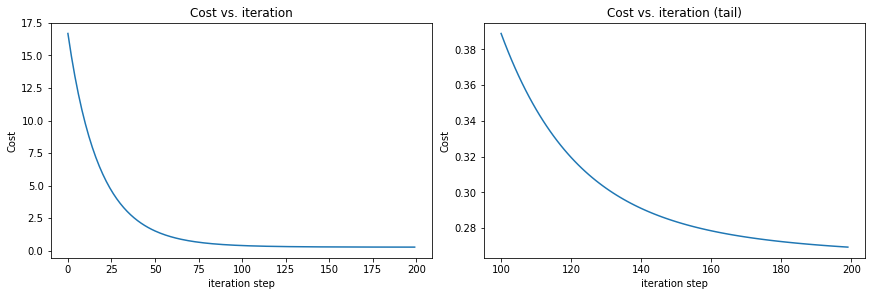

In [29]:
# initialize parameters
b_init = 0
w_init = np.array([ 0,0,0,0,0,0,0,0,0,0])
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")
initial_w = np.zeros_like(w_init)
initial_b = 0.
# gradient descent settings
iterations = 200
alpha = 2.5e-2
# run gradient descent 
print(X_norm)
w_final, b_final, J_hist = gradient_descent(X_norm, y_train, initial_w, initial_b,alpha, iterations)
print(f"b,w found by gradient descent: {b_final},{w_final} ")
m,_ = X_norm.shape
for i in range(m):
    print(f"prediction: {np.dot(X_norm[i], w_final) + b_final}, target value: {y_train[i]}")

print(J_hist)
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()



La descente de gradient nous donne les coefficients de la régression linéaire qui minimise l'erreur.

INFLUENCE DE L'HYPERPARAMETRE ALPHA

Alpha est l'hyperparamètre de la descente de gradient qui met à jour les coefficients de la regression à chaque itération. Plus alpha sera grand, plus l'ajustement sera important.

Iteration 0 : Cost  4.352422970146667
Iteration 20 : Cost  0.2630482831285957
Iteration 40 : Cost  0.2626541119764199
Iteration 60 : Cost  0.2626144917288234
Iteration 80 : Cost  0.26260822959879654
Iteration 100 : Cost  0.26260720448686414
Iteration 120 : Cost  0.26260703610712804
Iteration 140 : Cost  0.2626070084400168
Iteration 160 : Cost  0.26260700389375274
Iteration 180 : Cost  0.26260700314670693
Iteration 0 : Cost  17.45665769361015
Iteration 20 : Cost  14.03958880487902
Iteration 40 : Cost  11.358840423781652
Iteration 60 : Cost  9.235500678559475
Iteration 80 : Cost  7.541528517588306
Iteration 100 : Cost  6.18269512133452
Iteration 120 : Cost  5.088078321979959
Iteration 140 : Cost  4.203350197129073
Iteration 160 : Cost  3.4863264293050342
Iteration 180 : Cost  2.9039100226113206


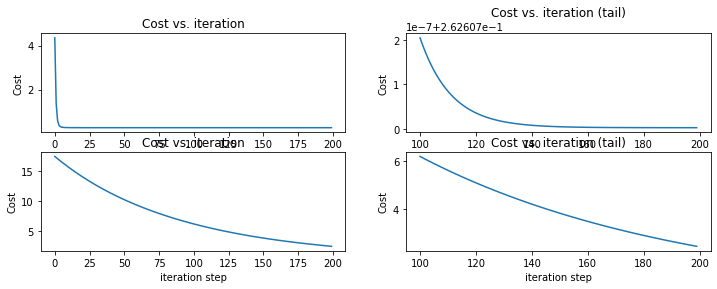

In [30]:
alpha1 = 5.0e-1
alpha2 = 5.0e-3
fig, [[ax1,ax2],[ax3,ax4]]= plt.subplots(nrows=2, ncols=2, figsize=(12, 4))
w_final1, b_final1, J_hist1 = gradient_descent(X_norm, y_train, initial_w, initial_b,alpha1, iterations)
w_final2, b_final2, J_hist2 = gradient_descent(X_norm, y_train, initial_w, initial_b,alpha2, iterations)



ax1.plot(J_hist1)
ax2.plot(100 + np.arange(len(J_hist1[100:])), J_hist1[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 

ax3.plot(J_hist2)
ax4.plot(100 + np.arange(len(J_hist2[100:])), J_hist2[100:])
ax3.set_title("Cost vs. iteration");  ax4.set_title("Cost vs. iteration (tail)")
ax3.set_ylabel('Cost')             ;  ax4.set_ylabel('Cost') 
ax3.set_xlabel('iteration step')   ;  ax4.set_xlabel('iteration step') 
plt.show()

Le premier alpha est trop grand, on risque de sauter l'optimum. Le second est trop petit, on ne l'atteint qu'après un trop grand nombre d'itérations...

TEST DU RESULTAT: Après avoir trouver nos coefficients permettant de minimiser l'erreur, on peut visualiser nos prédictions.

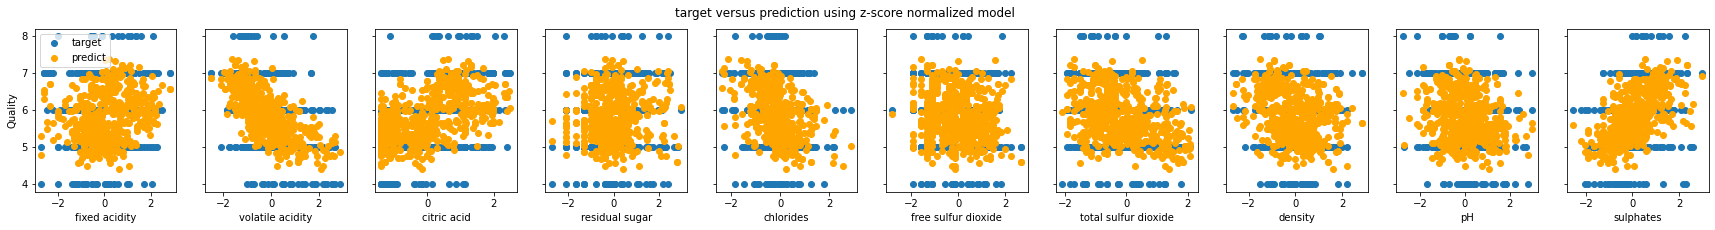

In [31]:
#predict target using normalized features
m = X_norm.shape[0]
yp = np.zeros(m)
for i in range(m):
    yp[i] = np.dot(X_norm[i], w_final) + b_final

    # plot predictions and targets versus original features    
fig,ax=plt.subplots(1,nb_feature,figsize=(30, 3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter([X_norm[:,i]],y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter([X_norm[:,i]],yp,color="orange", label = 'predict')
ax[0].set_ylabel("Quality"); ax[0].legend()
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()

Le résultat ne parait pas très bon. La régression linéaire n'est pas adaptée car on doit trouver des valeurs discrètes.